## Pie chart (Frequency of attending classes)

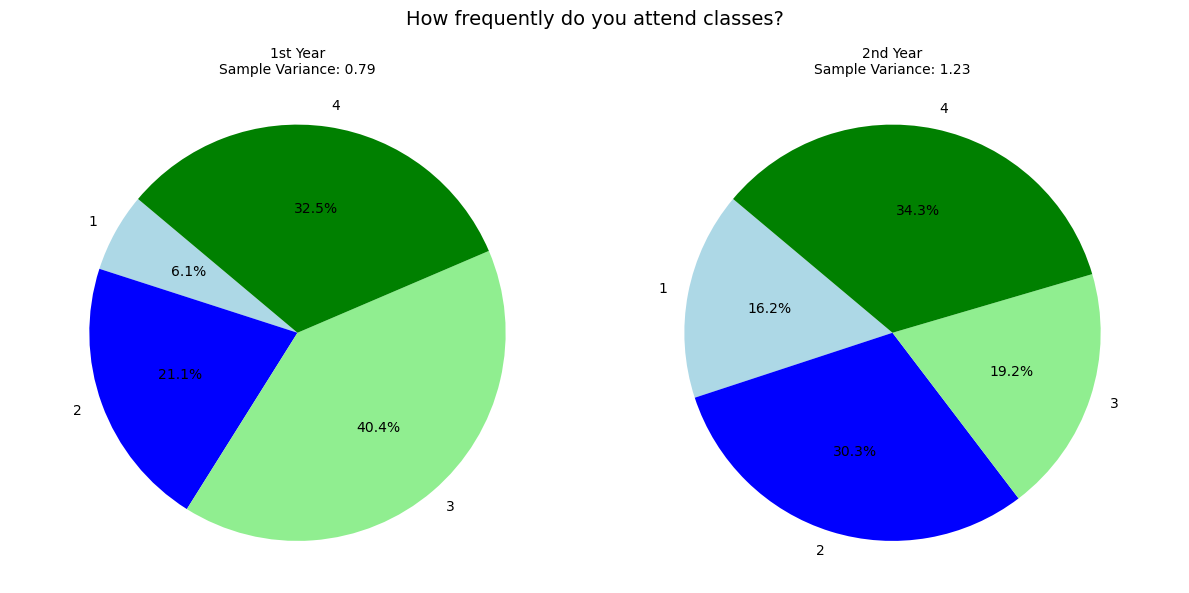

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('Modified_Response.csv')

# Filter the DataFrame for only 1st and 2nd years
df = df[df['year'].isin(['1st', '2nd'])]

# Create a mapping dictionary for encoding
encoding_map = {'Rarely': 1, 'Between Rarely and Often': 2, 'Often': 3, 'Almost every class(Lol..Prodigy)': 4}

# Encode the column 'How frequently do you attend classes?' using the mapping dictionary
df['encoded_c'] = df['How frequently do you attend classes?'].map(encoding_map)

# Calculate the frequency of each category for each year
category_counts = df.groupby(['encoded_c', 'year']).size().unstack(fill_value=0)

# Calculate sample variance for each group
sample_variances = df.groupby('year')['encoded_c'].var()

# Define colors
colors = ['#ADD8E6', '#0000FF', '#90EE90', '#008000']  

# Plot a pie chart for each year
plt.figure(figsize=(12, 6))
for i, year in enumerate(category_counts.columns, start=1):
    plt.subplot(1, 2, i)  # Subplot for each year
    plt.pie(category_counts[year], labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'{year} Year\nSample Variance: {sample_variances[year]:.2f}', fontsize=10)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.suptitle('How frequently do you attend classes?', fontsize=14)
plt.tight_layout()
plt.rcParams.update({'font.size': 10})
plt.show()


## Pie Chart for wake up times 

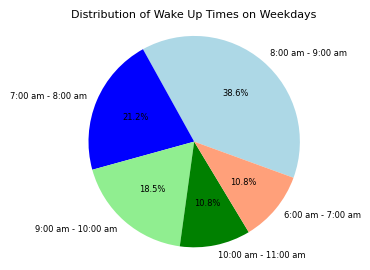

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = "MR.csv"  # Update the file path
df = pd.read_csv(file_path)

# Extract the column containing wake up times
wake_up_times = df["When do you wake up usually(weekdays)?"]

# Count the frequency of each wake up time
wake_up_counts = wake_up_times.value_counts()

# Define colors
colors = ['#ADD8E6', '#0000FF', '#90EE90', '#008000', '#FFA07A']  

# Plot a pie chart
plt.figure(figsize=(3, 3))
plt.pie(wake_up_counts, labels=wake_up_counts.index, autopct='%1.1f%%', startangle=-20, colors=colors)
plt.title('Distribution of Wake Up Times on Weekdays', fontsize=8)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Decrease font size for labelings
plt.rcParams.update({'font.size': 7})

plt.show()


## Mean Wake up time Calculation

In [ ]:
import pandas as pd

# Custom function to convert time string to minutes
def time_string_to_minutes(time_string):
    # Split the string by spaces and extract the first part (e.g., "x:00")
    start_time = time_string.split()[0]
    # Extract the hour part (e.g., "x") and convert it to an integer
    hour = int(start_time.split(":")[0])
    # Calculate the total minutes
    minutes = hour * 60
    return minutes

# Load the CSV file into a DataFrame
file_path = "MR.csv"  # Update the file path
df = pd.read_csv(file_path)

# Apply the custom function to convert the time string to minutes
df["Wake Up Time (minutes)"] = df["When do you wake up usually(weekdays)?"].apply(time_string_to_minutes)

# Calculate the mean wake-up time in minutes
mean_wake_up_time_minutes = df["Wake Up Time (minutes)"].mean()

# Print the mean wake-up time in hours and minutes
hours = mean_wake_up_time_minutes // 60
minutes = mean_wake_up_time_minutes % 60
print(f"Mean Wake Up Time: {int(hours)}:{int(minutes):02d} am")


## Sample variance of wake up times

In [50]:
import pandas as pd

# Custom function to convert time string to minutes
def time_string_to_minutes(time_string):
    # Split the string by spaces and extract the first part (e.g., "x:00")
    start_time = time_string.split()[0]
    # Extract the hour part (e.g., "x") and convert it to an integer
    hour = int(start_time.split(":")[0])
    # Calculate the total minutes
    minutes = hour * 60
    return minutes

# Load the CSV file into a DataFrame
file_path = "MR.csv"  # Update the file path
df = pd.read_csv(file_path)

# Apply the custom function to convert the time string to minutes
df["Wake Up Time (minutes)"] = df["When do you wake up usually(weekdays)?"].apply(time_string_to_minutes)

# Calculate the variance of wake up times in minutes
wake_up_variance = df["Wake Up Time (minutes)"].var()

print("Sample Variance of Wake Up Times:", wake_up_variance)


Sample Variance of Wake Up Times: 4560.15084852293


### Sample mean and variance of difference in attendance before and after launch of attendance app

In [2]:
import pandas as pd

# Load the data from A.csv
df = pd.read_csv('MR.csv')

# Calculate the difference between each corresponding pair of values in columns B and A
differences = df['How frequently have u attended classes after launching of attendance app?'] - df['How frequently have u attended classes before launching of attendance app?']

# Calculate the mean and sample variance of the differences
mean_difference = differences.mean()
sample_variance = differences.var(ddof=1)  # ddof=1 for sample variance

print("Mean difference:", mean_difference)
print("Sample variance:", sample_variance)


Mean difference: 0.30115830115830117
Sample variance: 1.0484870252312135


### Population pyramid of frequency of attendance before and after launch of attendance app

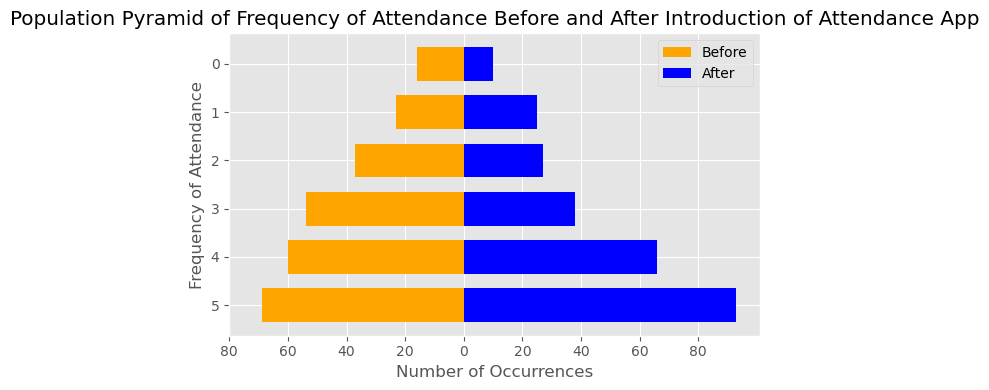

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('MR.csv')

# Extract the frequencies before and after introduction of the app
before_introduction = data['How frequently have u attended classes before launching of attendance app?'].tolist()
after_introduction = data['How frequently have u attended classes after launching of attendance app?'].tolist()

# Create a list of attendance frequencies ranging from 0 to 10
attendance_frequencies = list(range(5,-1,-1))

# Count occurrences of each attendance frequency before and after introduction
before_counts = [before_introduction.count(freq) for freq in attendance_frequencies]
after_counts = [after_introduction.count(freq) for freq in attendance_frequencies]

# Calculate the maximum count for setting x-axis limit symmetrically
max_count = max(max(before_counts), max(after_counts))

# Plot the population pyramid
fig, ax = plt.subplots(figsize=(6, 4))
plt.style.use('ggplot')
# Plot bars for before introduction
ax.barh(attendance_frequencies,[-count for count in before_counts], height = 0.7,color='orange', label='Before')
ax.barh(attendance_frequencies, after_counts, color='blue', label='After', height = 0.7)
# Plot bars for after introduction

# Adjust ticks and labels for y-axis
ax.set_xticks([-80,-60,-40,-20,0,20,40,60,80])
ax.set_xticklabels([80,60,40,20,0,20,40,60,80])
ax.set_yticks(attendance_frequencies)
ax.set_yticklabels(attendance_frequencies)
ax.invert_yaxis()  # Invert y-axis to have 0 at the top
ax.set_ylabel('Frequency of Attendance')  # Add y-axis label

# Add labels, title, legend, and grid
ax.set_xlabel('Number of Occurrences')
ax.set_title('Population Pyramid of Frequency of Attendance Before and After Introduction of Attendance App')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()